# 机器学习纳米学位
## 毕业项目
 周江浩 优达学城 </br>
 
2050年12月31日

## I. 问题的定义

### 项目概述
&ensp;&ensp;销售预测是指对未来特定时间内，全部产品或特定产品的销售数量与销售金额的估计。销售预测是在充分考虑未来各种影响因素的基础上，结合企业的销售实绩，通过一定的分析方法提出切实可行的销售目标。通过销售预测，可以调动销售人员的积极性，促使产品尽早实现销售，以完成使用价值向价值的转变。企业可以以销定产，根据销售预测资料，安排生产，避免产品积压。经过销售预测后，可对产品的补货安排进行提供参考数据。  
&ensp;&ensp;Rossmann是欧洲的一家连锁药店。 在这个源自Kaggle比赛[Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales)中，需要根据Rossmann药妆店的信息（比如促销，竞争对手，节假日）以及在过去的销售情况，来预测Rossmann未来的销售额。  

### 问题陈述
&ensp;&ensp;项目选择的数据集是 Rossmann 的销售数据，需要根据这些数据预测以后的销售量。这是一个回归问题，即要从所给的数据中提取出有效特征，建立回归模型进行预测。
&ensp;&ensp;第一步是数据探索，对数据进行可视化。  
&ensp;&ensp;第二步是特征工程。首先是数据预处理，对缺省值、异常值进行填值或者丢弃。接着是对部分特征进行离散化操作。然后是对原有特征进行融合、提取，形成新的特征。  
&ensp;&ensp;第三步是训练XGBoost和决策树模型。  
&ensp;&ensp;第四步是模型评估，分析xgboost的特征重要性表。

### 评价指标
&ensp;&ensp;由于是个回归预测问题，评估指标采用RMSPE(均方根误差)，它是观测值与真值偏差的平方和观测次数N比值的平方根。  
$$RMSPE = \sqrt{\frac{1}{N} \sum_{i=1}^{N}{(\frac{y_i - \hat{y_i}}{y_i})^2}}$$  
\\(y_i\\)为实际值，\\(\hat{y_i}\\)为预测值
方根误差对一组测量中的特大或特小误差反映非常敏感，所以，均方根误差能够很好地反映出测量的精密度。

## II. 分析

### 数据的探索
## 输入数据
&ensp;&ensp;项目共使用 3 个数据文件，分别是”train.csv“、“store.csv“和”test.csv“。输入数据为1115家Rossmann商店的历史销售记录和商店信息数据。
train数据集包含的数据域如下：

- Store: 门店的数字标识
- DayOfWeek: 周一到周日的数字标识
- Date: 日期，从2013-01-01到2015-07-31
- Sales: 单个门店在某个日期的销售额数据
- Customers: 单个门店在某个日期的顾客数
- Open: 指示门店是否开放（0表示关闭，1表示开放）
- Promo: 表示门店是否在进行促销（0表示否，1表示是）
- StateHoliday: 表示对应日期当天是否是法定假日（a表示是公共假日，b表示复活节，c表示圣诞节，0表示不是法定节日）
- SchoolHoliday: 表示对应日期当天是否是学校假日（0表示不是，1表示是）

store数据集包含的数据域如下：

- Store: 门店的数字标识
- StoreType: 一共四种不同类型的门店（a,b,c,d）
- Assortment: 描述门店上架的商品类型（a表示基本，b表示额外，c表示扩展）
- CompetitionDistance: 表示与最近的竞争对手门店的距离
- CompetitionOpenSinceMonth: 表示最近的竞争对手门店开业的月份
- CompetitionOpenSinceYear: 表示最近的竞争对手门店开业的年份
- Promo2: 表示一个门店是否进行了持续的促销（0表示否，1表示是）
- Promo2SinceWeek: 表示一个门店进行持续促销的开始的周数
- Promo2SinceYear: 表示一个门店进行持续促销的开始的年份
- PromoInterval: 表示门店开始促销的月份

test数据集数据域和train数据集一样，只是没给销售额数据和顾客数，额外的Id用于Kaggle上数据的提交。
&ensp;&ensp;初步观察这些数据，Promo2Since[Year/Week]、CompetitionOpenSince[Month/Year]、PromoInterval等列的数据缺失值较多，对这些缺失值用0填充。    
&ensp;&ensp;为了方便处理，将数据值为a, b, c，d的分别转换为1，2, 3，4。  
&ensp;&ensp;对离群值的检查可以用四分位距，主要是Sales和Customers两个特征。

### 探索性可视化
<pre>&lt;class 'pandas.core.frame.DataFrame'&gt;
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB
&lt;class 'pandas.core.frame.DataFrame'&gt;
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
</pre>
在导入train.csv和store.csv数据后，DataFrame对象索引、数据类型和内存信息如上。由上述信息可见，CompetitionOpenSinceMonth、CompetitionOpenSinceYear、Promo2SinceWeek、Promo2SinceYear和PromoInterval标签有缺省值。

<img src="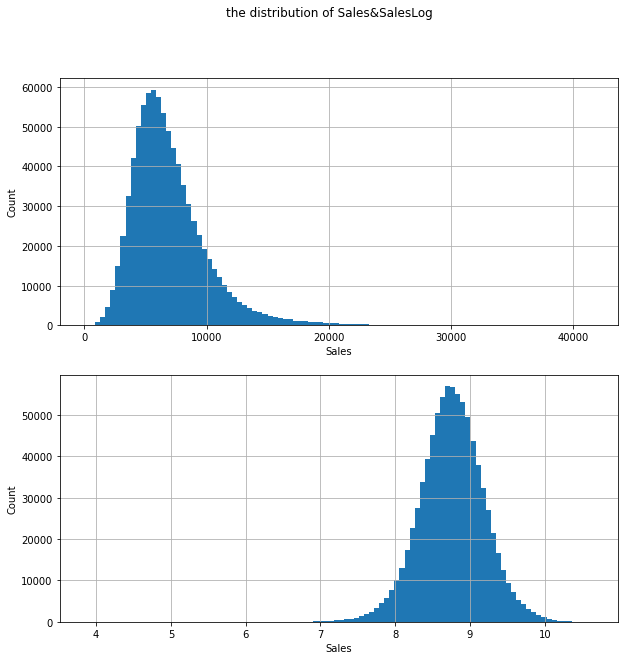" alt="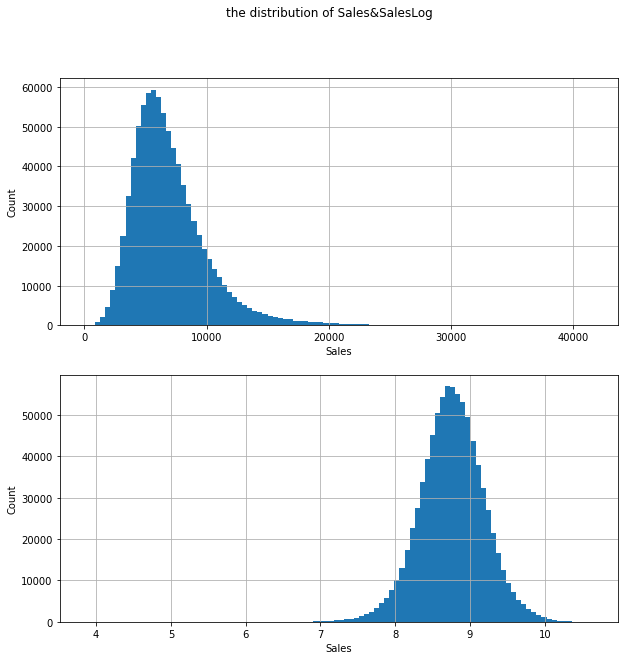" class="transparent overflowingVertical">  
<img src="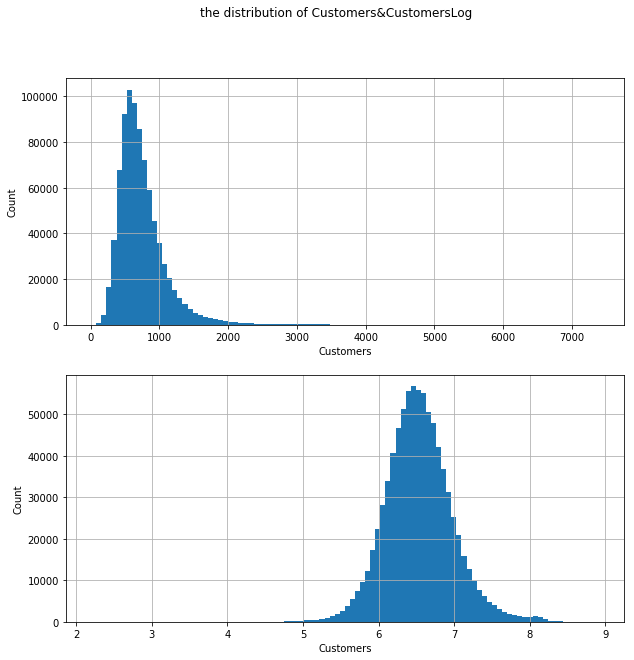" alt="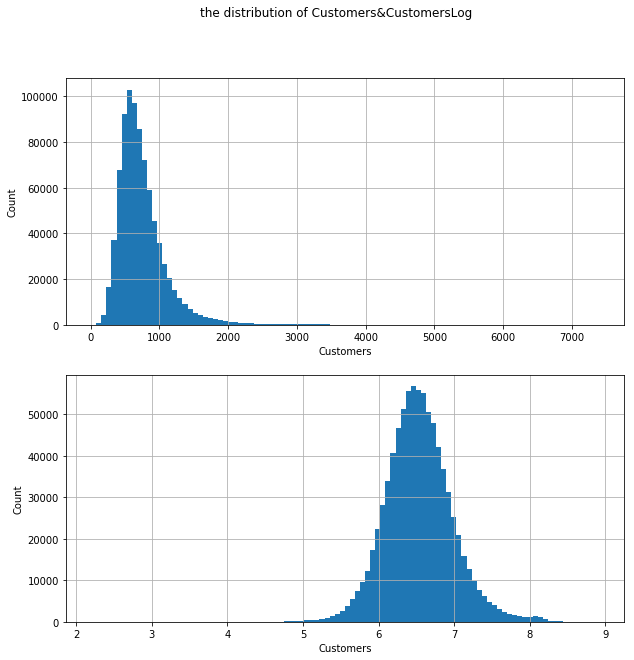" class="transparent overflowingVertical">  
图上是Sales和Customers的分布情况，由于有较大倾斜，因此对它们取log1p后再查看它们的分布。取log1p后的分布为正态分布。

<img src="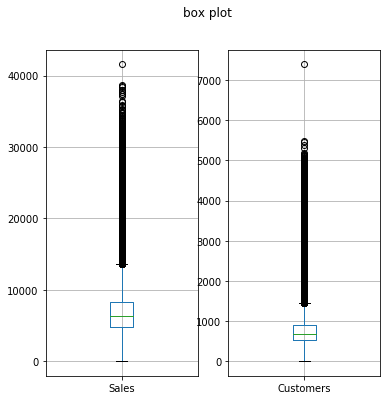
">    
这是Sales和Customers的箱形图，可以看到两个都有离群值

<img src="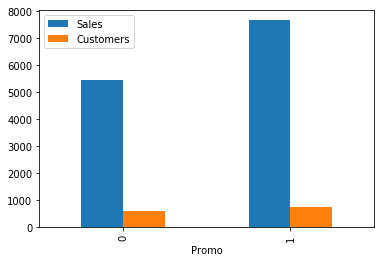
">    
这是商店促销和非促销状态的Sales和Customers中位数的柱状图。促销状态(Promo=1)的Sales和Customers高于非促销状态(Promo=0)的

<img src="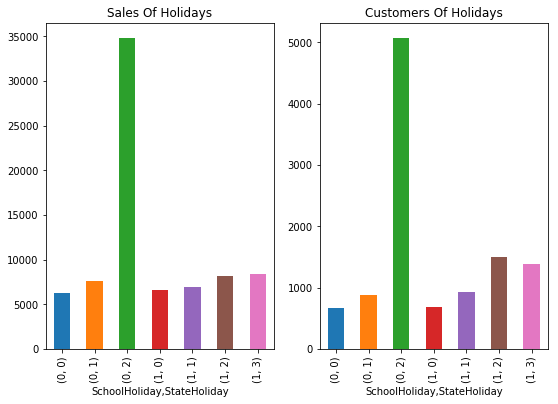" alt="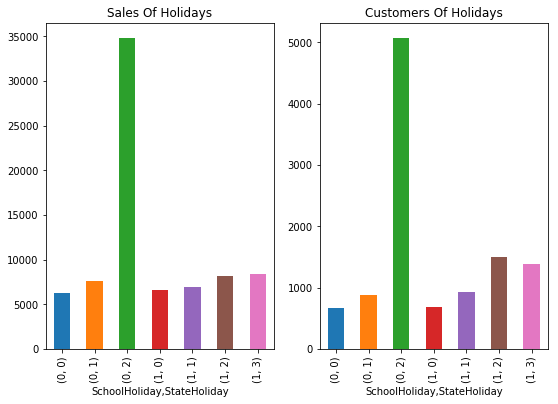" class="shrinkToFit transparent" width="455" height="330">  
这是节假日与非节假日的Sales和Customers中位数柱状图。由图可知，非节假日(SchoolHoliday和StateHoliday均为0)的Sales和Customers小于节假日的Sales和Customers。当StateHoliday为2即Easter holiday时Sales和Customers的Sales和Customers最高。

<img src="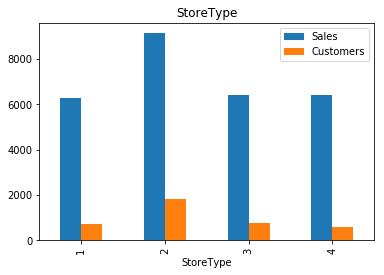" alt="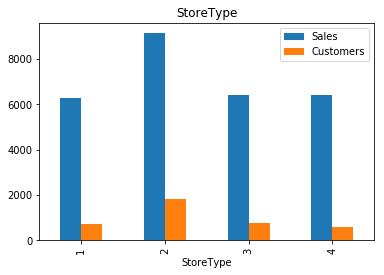" class="transparent">  
这是StoreType的Sales和Customers中位数柱状图。由图可知，StoreType为2即b的Sales和Customers最高。剩余的StoreType的Sales和Customers差不多。

<img src="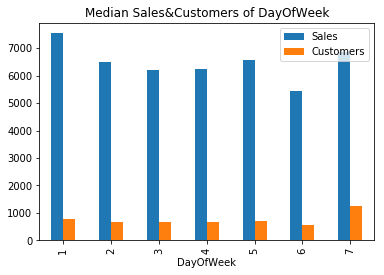" alt="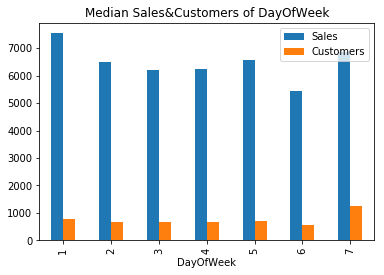" class="transparent">  
这是星期一到星期天的Sales和Customers中位数柱状图。由图可知，星期一的Sales和Customers最高，周六的Sales和Customers最低。

<img src="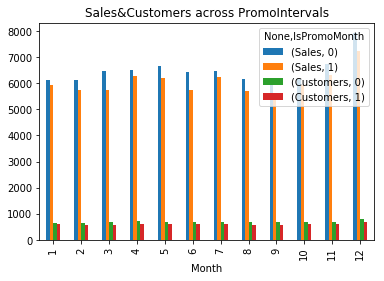" alt="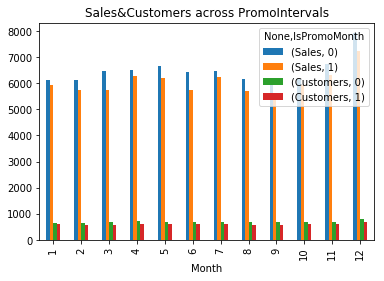" class="transparent">  
这是12个月的Sales和Customers中位数柱状图。isPromoMonth为1，则此月为促销月；isPromoMonth为0，则此月为非促销月。由图可知，当月不促销商店的Sales和Customers高于促销的。

### 算法和技术
#### 决策树
&ensp;&ensp;决策树是运用于分类的一种树结构，其中的每个内部节点代表对某一属性的一次测试，每条边代表一个测试结果，叶节点代表某个类或类的分布。决策树的决策过程需要从决策树的根节点开始，待测数据与决策树中的特征节点进行比较，并按照比较结果选择选择下一比较分支，直到叶子节点作为最终的决策结果。
&ensp;&ensp;决策树的学习过程：

- 特征选择：从训练数据的特征中选择一个特征作为当前节点的分裂标准（特征选择的标准不同产生了不同的特征决策树算法）。
- 决策树生成：根据所选特征评估标准，从上至下递归地生成子节点，直到数据集不可分则停止决策树停止声场。
- 剪枝：决策树容易过拟合，需要剪枝来缩小树的结构和规模（包括预剪枝和后剪枝）。  

&ensp;&ensp;实现决策树的算法包括ID3、C4.5算法等。
#### XGBoost算法
&ensp;&ensp;在监督学习中，我们会构造一个目标函数，试用训练样本对目标函数最小化学习到相关的参数，然后用预测函数和训练样本得到的参数来对未知的样本进行分类的标注或者数值的预测。一般目标函数是$Obj(\theta)=L(\theta)+\Omega(\theta)$形式的（目标函数$Obj(\theta)$，损失函数$L(\theta)$，正则化因子$\Omega(\theta)$），我们通过对目标函数最小化，求解模型参数$\theta$。$Obj(\theta)$、$L(\theta)$、$\Omega(\theta)$在不同模型下是各不相同的。
&ensp;&ensp;xgboost的目标函数定义如下：
$$
\begin{align}
Obj^{(t)} & =\sum_{i=1}^{n}l(y_{i},\hat{y}_{i}^{(t)}+\sum_{i=1}^{t} \Omega(f_{i}) \\
& =\sum_{i=1}^{n}l(y_{i},\hat{y}_{i}^{(t-1)}+f_{t}(x_{i}))+\Omega(f_{t})+constant
\end{align}
$$
其中，t表示第t轮，$f_{t}$表示第t轮所生成的树模型，$\Omega(f_{i})$表示正则项，常数项constant=$\sum_{i=1}^{t-1}\Omega(f_{i})$。接下来用泰勒展开来定义一个近似的目标函数：
$$
Obj^{(t)}\simeq\sum_{i=1}^{n}[l(y_{i},\hat{y}_{i}^{(t-1)})+g_{i}f_{t}(x_{i})+0.5h_{i}f_{t}^{2}(x_{i})]+\Omega(f_{t})+constant
$$
$$g_{i}=\partial _{\hat{y}^{(t-1)}}l(y,\hat{y}^{(t-1)}),h_{i}=\partial _{\hat{y}^{(t-1)}}^{2}l(y_{i},\hat{y}^{(t-1)})$$
因为$l(y_i,y_i^{(t−1)})$的值由之前的过程决定，所以本轮不变，constant也不影响本轮的训练，所以将这两者其去掉，得到：  
$$
Obj^{(t)}\simeq\sum_{i=1}^{n}[g_{i}f_{t}(x_i)+0.5h_{i}f_{t}^{2}(x_i)]+\Omega(f_t)
$$
现在的目标函数有一个非常明显的特点，它只依赖于每个数据点在误差函数上的一阶导数和二阶导数。接下来，我们对ft的定义做一下细化，将树拆分成结构部分q和叶子权重部分w：
$$f_t(x)=w_q(x)$$

当我们给定了如上定义之后，就可以对树的复杂度Ω(ft)进行定义了：
$$\Omega(f_t)=\gamma T+0.5\lambda\sum_{j=1}^{T}w_{j}^{2}$$
其中，第一部分中的T为叶子的个数，第二部分为$w$的L2模平方。可以将目标函数继续转化为：  
$$
\begin{align}
Obj^{(t)} & \simeq\sum_{i=1}^{n}[g_{i}f_{t}(x_i)+0.5h_{i}f_{t}^{2}(x_i)]+\Omega(f_t) \\
& =\sum_{i=1}^{n}[g_{i}f_{t}(x_i)+0.5h_{i}f_{t}^{2}(x_i)]+\gamma T+0.5\lambda\sum_{j=1}^{T}w_{j}^{2} \\
& =\sum_{j=1}^{T}[(\sum_{i\subset{I_j}}g_i)w_j+0.5(\sum_{i\subset{I_j}}h_i+\lambda)w_{j}^{2}]+\gamma T
\end{align}
$$
其中，$I_j$为每个叶子节点上的样本集合$I_j=\{i|q(x_i)=j\}$。现在这个目标函数包含了T个相互独立的单变量二次函数，我们定义：
$$G_i=\sum_{i\subset{I_j}}g_i, H_j=\sum_{i\subset{I_j}}h_i$$

那么我们就得到了最终的目标函数样子：
$$Obj^{(t)}=[G_{j}w_{j}+0.5(H_j+\lambda)w_j^2]+\gamma T$$
现在假设$q$已知，通过将上式对$w$求导并令其等于0，就可以求出令$Obj^{(t)}$最小的$w$：
$$w_{j}^{*}=−\frac{G_j}{H_j+\lambda}$$

剩下的工作就很简单了，通过改变树的结构来找到最小的w∗j，而对应的结构就是我们所需要的结果。
不过枚举所有树的结构不太可行，所以常用的是贪心法，每一次尝试去对已有的叶子加入一个分割。对于一个具体的分割方案，我们可以获得的增益可以由如下公式计算：
$$
Gain=\frac{1}{2}[\frac{G_L^2}{H_L+\lambda}+\frac{G_R^2}{H_R+\lambda}−\frac{G_L^2+G_R}{H_L+H_R+\lambda}]−\gamma
$$
&ensp;&ensp;xgboost与传统的GBDT相比，对代价函数进行了二阶泰勒展开，同时用到了一阶与二阶导数，而GBDT在优化时只用到一阶导数的信息。另一方面，xgboost在损失函数里加入的正则项可用于控制模型的复杂度。正则项里包含了树的叶子节点个数、每个叶子节点上输出score的L2模的平方和。正则项降低了模型的variance，使学习出来的模型更加简单，防止过拟合，这也是xgboost优于传统GBDT的一个特性。
#### 技术
&ensp;&ensp;项目中将会使用scikit-learn中的决策树模型简单看下效果，之后会主要使用xgboost方法。scikit-learn是机器学习中一个常用的python第三方模块，里面对一些常用的机器学习方法进行了封装，调用起来十分方便。xgboost是Gradient Boosting Machine的一个C++实现，可以下载安装并应用于Python，最大的特点在于它能够自动利用CPU的多线程进行并行，同时在算法上加以改进提高了精度。

### 基准模型
选用决策树模型做为基准模型。决策树回归模型通过从数据特征中学习决策规则来训练模型，运行速度较快，能够根据赛题的特征来学习规则，从而实现较好的预测。

## III. 方法

### 数据预处理
数据预处理包括缺失值处理和特征值转换。  
缺失值处理：  
- Open列的缺失值用1填充。原因是如果商店实际是关闭的，那么它的销量是0，对模型误差评分没影响；但如果商店实际是开放的，却当做关闭处理，会导致较大误差。  
- CompetitionDistance列的缺失值用0填充。
- CompetitionOpenSince[Month/Year]列的缺失值用中值填充。
特征值转换：
- 将Date列中的日期信息分解为不同类型的时间信息，包括Year、Month、Day、DayOfWeek、WeekOfYear
- 将StateHoliday、StoreType、Assortment三列的值进行转换，'a'转成1，'b'转成2，'c'转成3，'d'转成4，'0'转为0。

### 特征处理
根据Kaggle上[Gert](https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)和[cast42](https://www.kaggle.com/cast42/xgboost-in-python-with-rmspe-v2/code)的方法，我提取了29个特征：
- 数据集直接提取的特征，包括Store、CompetitionDistance、Promo、Promo2、SchoolHoliday、StoreType、Assortment、StateHoliday、DayOfWeek、Month、Day、Year、WeekOfYear、DayOfYear
- IsPromoMonth：当前月份是否是门店开始进行促销的月份，如果是，标记该特征的值为1，否则标记为0
- holidays_thisweek、holidays_lastweek、holidays_nextweek：本周、上周和下周的学校节假日的天数
- CompetitionOpen：门店的竞争对手从开业到当前日期所经历的时长，以月为单位
- PromoOpen：门店开始进行持续促销的日期到当前日期所经历的时长，以月为单位
- SalesAvgPerStore：每个门店在开放的天数里的平均销售额
- CustomersAvgPerStore：每个门店在开放的天数里的平均顾客数
- SalesAvgPerCustomer：每个门店每位顾客的平均销售额
- SalesPerStateHoliday、SalesPerSchoolHoliday：每个门店在国家节假日、学习节假日的平均销售额
- SalesAvgPerDow、SalesMedPerDow：每个门店每周的平均销售额和销售额的中位数
- CustomersAvgPerDow、CustomersMedPerDow：每个门店每周的平均顾客数和顾客数的中位数

### 执行过程
&ensp;&ensp;在本项目中用了两种模型：决策树模型和xgboost模型。在建立模型的过程中，尝试了不同的特征组合，看不同的特征子集对模型表现的影响。在使用xgboost模型时，将几个不同的xgboost模型进行了融合，结果表明，效果相比单一模型有一定的提升。  
&ensp;&ensp;对于模型训练集和交叉验证集的划分，考虑到模型最终是要预测未来连续六周的销售额，所以采用了$train$数据集中最后六周的训练数据作为交叉验证集，其余的数据用来训练，这样的策略更符合模型的目标：使用历史销售数据来预测未来的销售数据。而不是一般采用的将训练集随机划分为训练集和交叉验证集的策略。
#### 决策树模型
&ensp;&ensp;首先，我实现了一个简单的决策树模型，这个模型只使用了一些基本的特征，包括【'Store', 'CompetitionDistance', 'Promo', 'Promo2', 'SchoolHoliday',
'StoreType', 'Assortment', 'StateHoliday', 'DayOfWeek', 'Month', 'Day', 'Year', 'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth'】
。 最终结果如下  

| Private Score | Public Score | 
| ------------- | ------------ | 
| 0.21986 | 0.18721 |
#### xgboost模型
&ensp;&ensp;我用所有提取出来的特征建立一个基准xgboost模型A，模型参数如下：
```python
params = {
    'objective': 'reg:linear',
    'booster': 'gbtree',
    'eta': 0.03,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'silent': 1,
    'seed':1301,
    'num_round': 3000,
    'early_stopping_rounds': 50
}
```
最终结果为：

| Train RMSPE | Validation RMSPE | Private Score | Public Score |
| ----------- | ---------------- | --------------| ------------ |
| 0.07649     | 0.11709          | 0.12202       |  0.11291     |
下面是各特征的重要性排序：
![feature_importance_xgb](feature_importance_xgb.png)

### 完善
根据基准模型的特征排序图，以前15的特征【'SalesAvgPerStore', 'CustomersAvgPerStore', 'Month', 'DayOfWeek', 'SalesAvgPerCustomer', 'CustomersAvgPerDow', 'SalesMedPerDow', 'SalesAvgPerDow', 'CompetitionDistance', 'WeekOfYear', 'Store', 'PromoOpen', 'CompetitionOpen', 'DayOfYear', 'Day'】为基础特征，从剩余的特征【'CustomersMedPerDow', 'SalesPerSchoolHoliday', 'Year', 'holidays_thisweek', 'Promo', 'SalesPerStateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'IsPromoMonth', 'Promo2', 'StateHoliday', 'holidays_nextweek', 'holidays_lastweek'】中选取6、7、8、9个特征，选取5次，组成有21、22、23、24特征的共20个特征子集。根据这20个特征子集建立xgboost模型，每个模型的参数如下，与模型A的参数一致。

```python
params = {
    'objective': 'reg:linear',
    'booster': 'gbtree',
    'eta': 0.03,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'silent': 1,
    'seed':1301,
    'num_round': 3000,
    'early_stopping_rounds': 50
}
```

从上述20个模型和基准模型A中选取模型，进行模型融合。本项目中采用了最简单的平均法，同时对最终结果乘上了一个常数因子，模型融合公式如下：
$$
average =\frac{ (y_{pred\_1} + ... + y_{pred\_n}) } {n} * alpha
$$
其中$y_{pred\_n}$表示第$n$个模型的预测值，$n$为融合的模型个数，$alpha$为乘数因子。
这20个模型中，交叉验证集误差最小的模型的信息如下，记为模型B：


| Features         | 'SalesAvgPerStore', 'CustomersAvgPerStore', 'Month', 'DayOfWeek', 'SalesAvgPerCustomer', 'CustomersAvgPerDow', 'SalesMedPerDow', 'SalesAvgPerDow', 'CompetitionDistance', 'WeekOfYear', 'Store', 'PromoOpen', 'CompetitionOpen', 'DayOfYear', 'Day', 'SalesPerStateHoliday', 'StateHoliday', 'holidays_thisweek', 'Promo', 'SalesPerSchoolHoliday', 'CustomersMedPerDow' |
| ---------------- | --------- |
| Validation RMSPE | 0.11223   |
|  Private Score   | 0.12780
|  Public Score  | 0.11398   |
取alpha=1，将模型A和模型B融合，得分如下：
| Private Score | Public Score |
| --------------| ------------ |
| 0.12328       | 0.11227      |


对模型B选取了6个xgboost参数进行调参，分别为：

- $max\_depth$：一棵树的最大深度值，用于控制模型的拟合情况；
- $subsample$：用于训练模型的子样本占整个样本集合的比例
- $colsample\_bytree$：在建树时对特征采样的比例
- $eta$：更新过程中用到的收缩步长，eta通过缩减特征的权重使提升计算过程更加保守
- $num\_round$：提升迭代计算的次数
- $early\_stopping\_rounds$：提前终止循环的次数

受限于计算资源，具体的调参步骤如下：

1. 先对$max\_depth$，$subsample$，$colsample\_bytree$三个参数进行优化，保持其它参数不变。其中$max\_depth$的取值范围为【9,10,11】，$subsample$的取值范围为【0.6,0.7】，$colsample\_bytree$的取值范围为【0.6,0.7】；
2. 在第1步中得到的三个参数的最优值的基础上，$eta$参数值为0.01，参数$num\_round$为8000，$early\_stopping\_rounds$参数值为500。

经过上面的调参过程，最终调整后的模型B的参数如下：

```python
parameters = {
                  'objective': 'reg:linear',
                  'booster': 'gbtree',
                  'eta': 0.01,
                  'max_depth': 11,
                  'subsample': 0.7,
                  'colsample_bytree': 0.6,
                  'silent': 1,
                  'seed': 1301,
    			  'num_round': 8000,
                  'early_stopping_rounds': 500
             }
```

最后的结果是

| Train RMSPE | Validation RMSPE | Private Score | Public Score |
| ----------- | ---------------- | --------------| ------------ |
| 0.06397     | 0.11121          | 0.12685       | 0.11257      |

再将A和B融合，alpha=1，最后结果：

| Private Score | Public Score |
| --------------| ------------ |
| 0.12291       | 0.11155      |

从训练过的模型的训练误差和测试误差来看，A和B都是过拟合的，为了使融合后的模型具有更好的泛化能力，因此再选择误差最大的模型C和次大的模型D，alpha=0.984,最后结果:

| Private Score | Public Score |
| --------------| ------------ |
| 0.11837       | 0.10958      |

但由于Private Score还是没进top 10%，我用A、B和D融合，alpha=0.985，最终得到的模型得分:

| Private Score | Public Score |
| --------------| ------------ |
| 0.11754       | 0.10902      |

可以看出，这也是目前得到的最好结果，于是就将其作为最终结果。

## IV. 结果

### 模型的评价与验证
最终XGBoost的结果

| Private Score | Public Score |
| --------------| ------------ |
| 0.11754       | 0.10902      |

决策树模型拟合效果不理想，因此采⽤xgboost模型。在应⽤xgboost模型的过程中，⾸先利⽤所有特征训练⼀个基准xgboost模型，效果⽐之前的决策树模型好，但是出现了较严重的过拟合现象，因此使⽤模型融合技术来减轻单个模型的过拟合现象。接下来再构建一些xgboost模型，xgboost基准模型出现过拟合现象可能是特征数太多，于是从所有特征中随机选取不同数量的特征⼦集来训练xgboost模型，构建了20个模型，然后从这些模型中选出交叉验证集误差最⼩的模型进⾏调参，得到另⼀个将要被融合的模型。之后⼜从20个模型中选择验证集误差次大的模型，将这三个模型进⾏了简单的平均数融合。融合后的模型在测试集上的Public Score和Private Score分别为0.10902和0.11754，说明融合后的模型有了较好的泛化性能。

### 合理性分析
最终结果与基准模型在测试集上的Public Score和Private Score的对比如下表所示：

|      | Public Score       | Private Score      |
| ---- | ------------------ | ------------------ |
| 基准模型 | 0.21986 | 0.18721 |
| 最终模型 |  0.11754       | 0.10902      |

可以看出最终模型在测试集上的Public Score和Private Score均小于基准模型，并且Score的值也相对较小，结合项目的评价标准RMSPE的定义，说明最终模型确实具有较好的泛化性能，即最终模型对门店未来六周的销售额预测准确度较高。

## V. 项目结论

### 结果可视化
XGBoost特征图：
![feature_importance_xgb](feature_importance_xgb.png) 
决策树特征图：
![feature_imortance_tree](feature_importance_dtree.png)
由上面两幅图可以看出，XGBoost和决策树模型的特征重要性并不一致。XGBoost最重要的五个特征是Day、DayOfYear、CompetitionOpen、PromoOpen和Store，前四个都是与时间相关的特征；决策树最重要的五个特征是CompetitionDistance、Store、Promo、CompetitionOpen和DayOfWeek。XGBoost模型相比决策树模型对时间更敏感，主要是从 Rossmann 销售的时间规律中学习。

### 对项目的思考
1.特征处理是重点也是难点，特征处理得好坏直接影响模型的好坏。  
2.在模型方面，第一个xgboost模型的表现相比于基准模型有很大提升，但也严重的过拟合问题，因此用模型调参和模型融合来提升模型的表现。而模型调参和模型融合都需要进行大量的尝试，这是项目比较困难的地方。

### 需要作出的改进
模型并不优秀，Kaggle排名一般。改进点：
* 特征处理：对缺省值只是用0填充，未对离群值处理；可能有更好的方式提取时间信息
* 这里只用了XGBoost和决策树两种模型，还可以用其他模型进行预测

## 参考文档
Rossmann Store Sales, https://www.kaggle.com/c/rossmann-store-sales/data  
Kaggle上Gert 的帖子, https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)  
xgb‐rossmann代码, https://www.kaggle.com/cast42/xgboost-in-python-with-rmspe-v2/code  
xgboost, http://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf   
李航《统计学习方法》第5章决策树  